# Funciones de distribución de probabilidades
## Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
a = 1
b = 100
n = 1000000 # numero de datos
data = np.random.uniform(a, b, n)

(array([ 99917., 100083.,  99716.,  99733.,  99890.,  99916., 100238.,
        100515., 100167.,  99825.]),
 array([ 1.00001693, 10.90001047, 20.80000402, 30.69999756, 40.59999111,
        50.49998465, 60.3999782 , 70.29997174, 80.19996529, 90.09995883,
        99.99995238]),
 <a list of 10 Patch objects>)

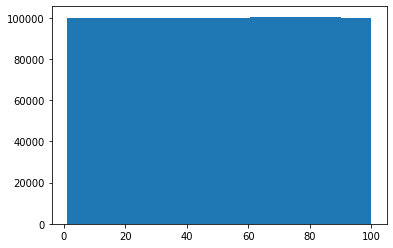

In [10]:
%matplotlib inline
plt.hist(data) # histograma

## Distribución Normal
La campana de Gauss

In [16]:
data = np.random.randn(1000000)

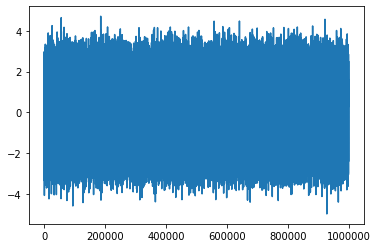

In [17]:
x = range(1,1000001)
plt.plot(x, data)

(array([3.00000e+01, 1.16300e+03, 1.82250e+04, 1.16765e+05, 3.12278e+05,
        3.49318e+05, 1.66645e+05, 3.28620e+04, 2.62200e+03, 9.20000e+01]),
 array([-4.96912503, -4.00151707, -3.03390912, -2.06630117, -1.09869321,
        -0.13108526,  0.8365227 ,  1.80413065,  2.77173861,  3.73934656,
         4.70695451]),
 <a list of 10 Patch objects>)

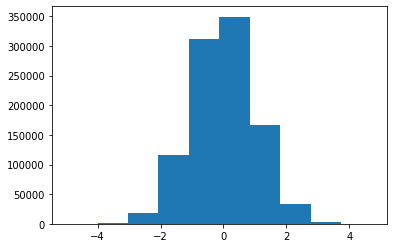

In [18]:
%matplotlib inline
plt.hist(data)

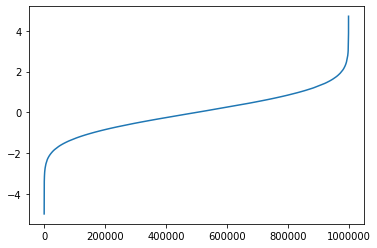

In [20]:
plt.plot(x,sorted(data)) # FUNCION DE DISTRIBUCION ACUMULADA

(array([2.000e+00, 3.600e+01, 2.120e+02, 1.011e+03, 2.394e+03, 3.087e+03,
        2.198e+03, 8.560e+02, 1.830e+02, 2.100e+01]),
 array([-5.38491355, -3.37482275, -1.36473195,  0.64535885,  2.65544965,
         4.66554045,  6.67563125,  8.68572205, 10.69581285, 12.70590365,
        14.71599445]),
 <a list of 10 Patch objects>)

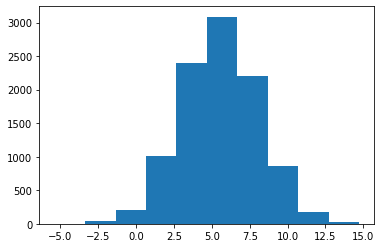

In [21]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z (TEOREMA CENTRAL DEL LIMITE)
plt.hist(data)

In [22]:
data = np.random.randn(2,4)
data

array([[ 0.16298618, -1.34900609, -0.62362721, -0.52351989],
       [-2.94177989, -0.02031933, -0.12887715,  0.58590355]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [24]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1422179999999993


(3.1422179999999993, [<matplotlib.lines.Line2D at 0x7f8d4207d1d0>])

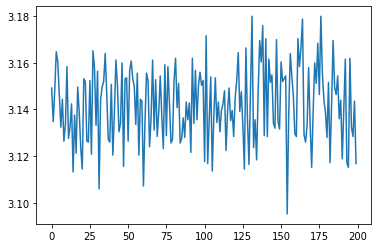

In [25]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [33]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)
data.shape

(1000000, 3)

In [34]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.001411,1.500367,18.502568
std,1.000176,2.502791,7.791516
min,-5.428141,-11.075555,5.000047
25%,-0.676222,-0.190215,11.754764
50%,-0.002704,1.500395,18.509113
75%,0.673968,3.188261,25.249558
max,4.856579,12.950754,31.999995


(array([8.00000e+00, 3.39000e+02, 9.27600e+03, 8.48000e+04, 2.94017e+05,
        3.82869e+05, 1.90696e+05, 3.53860e+04, 2.53600e+03, 7.30000e+01]),
 array([-5.42814076, -4.39966881, -3.37119686, -2.34272491, -1.31425297,
        -0.28578102,  0.74269093,  1.77116288,  2.79963483,  3.82810678,
         4.85657872]),
 <a list of 10 Patch objects>)

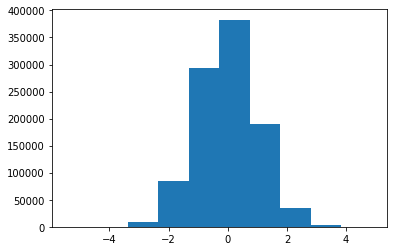

In [35]:
plt.hist(data["A"])

(array([2.70000e+01, 8.89000e+02, 1.49930e+04, 1.02194e+05, 2.93397e+05,
        3.57377e+05, 1.85963e+05, 4.12010e+04, 3.82300e+03, 1.36000e+02]),
 array([-11.07555471,  -8.67292381,  -6.27029291,  -3.86766201,
         -1.4650311 ,   0.9375998 ,   3.3402307 ,   5.7428616 ,
          8.14549251,  10.54812341,  12.95075431]),
 <a list of 10 Patch objects>)

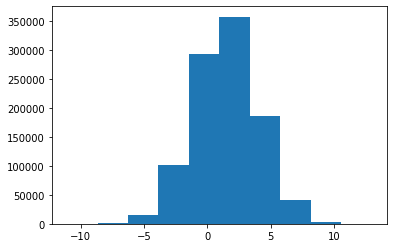

In [36]:
plt.hist(data["B"])

(array([ 99903.,  99666., 100062., 100324.,  99690., 100135., 100488.,
         99819., 100140.,  99773.]),
 array([ 5.00004651,  7.70004134, 10.40003617, 13.10003101, 15.80002584,
        18.50002067, 21.20001551, 23.90001034, 26.60000517, 29.30000001,
        31.99999484]),
 <a list of 10 Patch objects>)

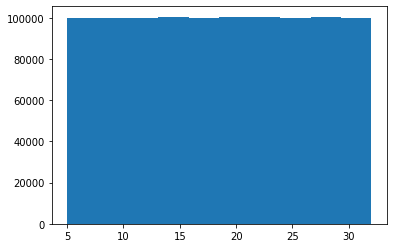

In [37]:
plt.hist(data["C"])

In [38]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [39]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [43]:
colum_names = data.columns.values.tolist()
print(colum_names)

['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


In [44]:
a = len(colum_names)
a

21

In [52]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)  # para completar desde un indixe deseado
)

In [53]:
new_data

,Column Name,A,B
42,State,-0.429527,0.102471
43,Account Length,-1.504504,0.789791
44,Area Code,-0.816521,0.875601
45,Phone,-1.199926,0.880277
46,Int'l Plan,0.961526,0.905249
47,VMail Plan,0.436061,0.751268
48,VMail Message,0.860341,0.362603
49,Day Mins,0.063422,0.127773
50,Day Calls,-0.259056,0.899555
51,Day Charge,1.177386,0.324030
